In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 미적분

## 결측치=0 kmeans

결측치를 0으로 채워넣었을 때의 클러스터링

In [ ]:
deriv = pd.read_csv('/content/drive/MyDrive/프리윌린/mijeok_column_110.csv')

In [ ]:
deriv_table = deriv.iloc[:,1:]

In [ ]:
deriv_table

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_1,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.546214,NaN,NaN,NaN,NaN,0.760096,0.143747,NaN,...,NaN,NaN,-2.048368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,-0.277275,NaN,NaN,NaN,NaN,NaN,0.318624,-0.576109,-0.412951,...,NaN,NaN,1.105011,NaN,NaN,NaN,NaN,0.325906,0.411361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.989583,NaN,-1.950932,NaN,NaN,NaN,-2.985229,NaN,NaN
9931,NaN,-3.198429,NaN,NaN,NaN,NaN,NaN,1.404408,NaN,NaN,...,NaN,0.608600,0.287469,0.258302,NaN,NaN,NaN,-0.756581,-0.486878,NaN
9932,NaN,-3.198429,NaN,NaN,NaN,NaN,NaN,1.404408,NaN,NaN,...,NaN,0.608600,0.287469,0.258302,NaN,NaN,NaN,-0.756581,-0.486878,NaN
9933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.989583,NaN,-1.950932,NaN,NaN,NaN,-2.985229,NaN,NaN


In [ ]:
deriv_table.fillna(0,inplace=True)
deriv_table.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_1,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### k=2,3,4,5에 따른 클러스터 분류

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
original_deriv = deriv_table

In [ ]:
#2개의 집단으로 구분함
deriv_kmeans2=deriv_table.copy(deep=False)
km = KMeans(n_clusters=2,  #cluster 개수
           init='random',
           n_init=10,
           max_iter=1000,
           tol=1e-04, 
           random_state=0)

y_km=km.fit_predict(deriv_kmeans2)
deriv_kmeans2['y_km']=y_km.tolist()
deriv_kmeans2.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(deriv_table)

deriv_kmeans2['pca_x'] = pca_transformed[:,0]
deriv_kmeans2['pca_y'] = pca_transformed[:,1]
deriv_kmeans2.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km,pca_x,pca_y
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.192242,-0.051438
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.747477,0.304858
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.323436,-0.622820


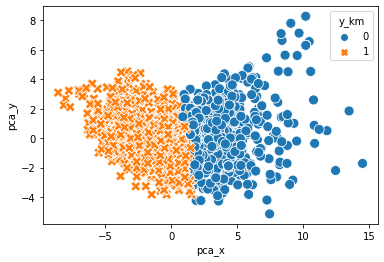

In [ ]:
sns.scatterplot(x='pca_x', y='pca_y', hue='y_km', style='y_km', s=100, data=deriv_kmeans2)

In [ ]:
#3개의 집단으로 구분함
deriv_kmeans3=deriv_table.copy(deep=False)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,  #cluster 개수
           init='random',
           n_init=10,
           max_iter=1000,
           tol=1e-04, 
           random_state=0)

y_km=km.fit_predict(deriv_kmeans3)
deriv_kmeans3['y_km']=y_km.tolist()
deriv_kmeans3.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
deriv_kmeans3['pca_x'] = pca_transformed[:,0]
deriv_kmeans3['pca_y'] = pca_transformed[:,1]
deriv_kmeans3.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km,pca_x,pca_y
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.192242,-0.051438
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.747477,0.304858
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.323436,-0.622820


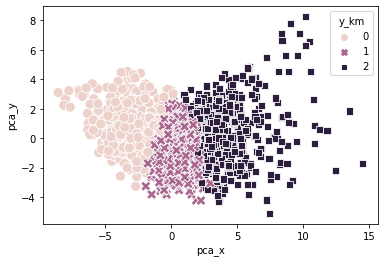

In [ ]:
sns.scatterplot(x='pca_x', y='pca_y', hue='y_km', style='y_km', s=100, data=deriv_kmeans3)

In [ ]:
deriv_kmeans4=deriv_table.copy(deep=False)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,  #cluster 개수
           init='random',
           n_init=10,
           max_iter=1000,
           tol=1e-04, 
           random_state=0)

y_km=km.fit_predict(deriv_kmeans4)
deriv_kmeans4['y_km']=y_km.tolist()
deriv_kmeans4.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


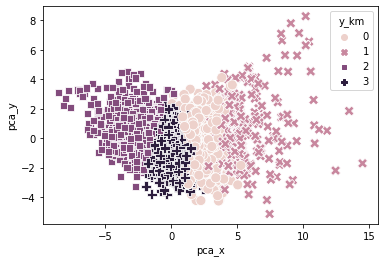

In [ ]:
deriv_kmeans4['pca_x'] = pca_transformed[:,0]
deriv_kmeans4['pca_y'] = pca_transformed[:,1]
sns.scatterplot(x='pca_x', y='pca_y', hue='y_km', style='y_km', s=100, data=deriv_kmeans4)

In [ ]:
deriv_kmeans5=deriv_table.copy(deep=False)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,  #cluster 개수
           init='random',
           n_init=10,
           max_iter=1000,
           tol=1e-04, 
           random_state=0)

y_km=km.fit_predict(deriv_kmeans5)
deriv_kmeans5['y_km']=y_km.tolist()
deriv_kmeans5.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


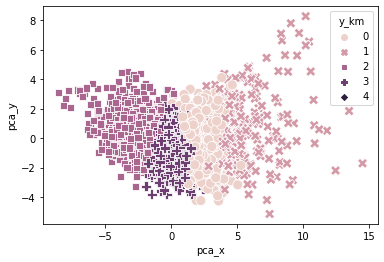

In [ ]:
deriv_kmeans5['pca_x'] = pca_transformed[:,0]
deriv_kmeans5['pca_y'] = pca_transformed[:,1]
sns.scatterplot(x='pca_x', y='pca_y', hue='y_km', style='y_km', s=100, data=deriv_kmeans5)

In [ ]:
deriv_kmeans6=deriv_table.copy(deep=False)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6,  #cluster 개수
           init='random',
           n_init=10,
           max_iter=1000,
           tol=1e-04, 
           random_state=0)

y_km=km.fit_predict(deriv_kmeans6)
deriv_kmeans6['y_km']=y_km.tolist()
deriv_kmeans6.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


### 실루엣 분석 진행
- 실루엣 계수 = 개별 데이터가 같은 군집 내의 데이터와 얼마나 가깝고, 다른 군집의 데이터와 얼마나 분리되어 있는지를 나타내는 지표
- 1에 가까울수록 잘 분리
- 음수면 같은 군집 데이터보다 다른 군집의 데이터가 더 가깝다는 의미(군집화 잘못됨)

In [ ]:
deriv_table.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_1,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,0.0,0.0,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def silhouette_analysis(i,data): #몇개 cluster,입력데이터
  # Clustering
  km = KMeans(n_clusters=i,
            init='random',
            n_init=10,
            max_iter=1000,
            tol=1e-04,
            random_state=0)
  y_km=km.fit_predict(data)

  # Evaluating silhouette coefficients
  from sklearn.metrics import silhouette_samples
  silhouette_vals=silhouette_samples(data,y_km, metric='euclidean')

  # Ploting
  from matplotlib import cm
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i,c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i)/n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper),
              c_silhouette_vals,
              height=1.0,
              edgecolor='none',
              color=color)
      yticks.append((y_ax_lower+y_ax_upper)/2.)
      y_ax_lower += len(c_silhouette_vals)

  # Ploting average of silhouette coefficients
  silhouette_avg = np.mean(silhouette_vals)
  plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")

  # Layout
  plt.yticks(yticks, cluster_labels+1)
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.tight_layout()
  plt.show()

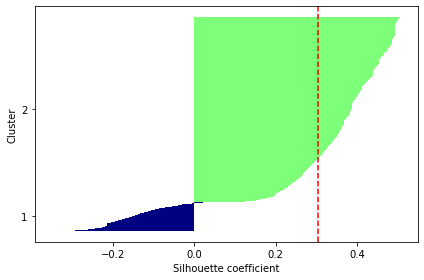

In [ ]:
#45초
silhouette_analysis(2,deriv_table) 

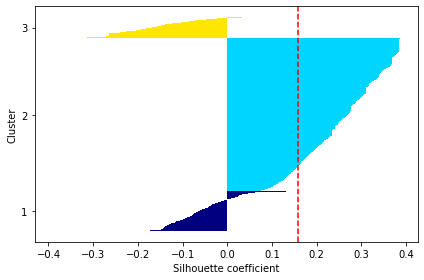

In [ ]:
silhouette_analysis(3,deriv_table)

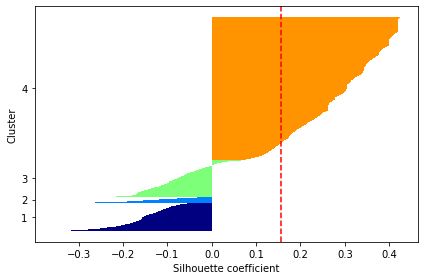

In [ ]:
silhouette_analysis(4,deriv_table)

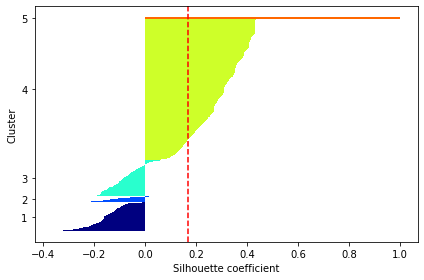

In [ ]:
silhouette_analysis(5,deriv_table)

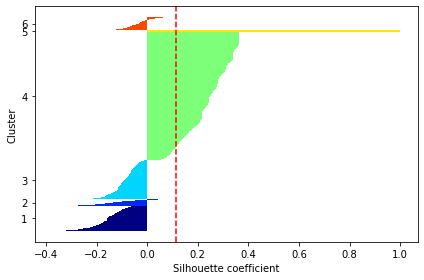

In [ ]:
silhouette_analysis(6,deriv_table)

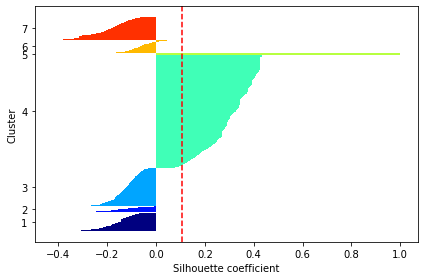

In [ ]:
silhouette_analysis(7,deriv_table)

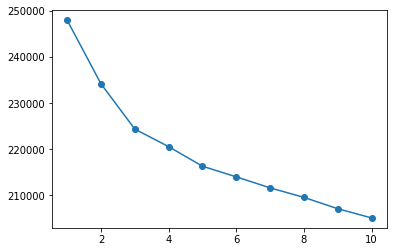

In [ ]:
#elbow method
distortions = []

#cluster의 개수별로 SSE 구해보자!
#어디까지 나눠야하는가?에 대한 판단은 정성적으로 

for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='random',
               n_init=10,
               max_iter=1000,
               random_state=0)
    km.fit(deriv_table)
    distortions.append(km.inertia_)
distortions

import matplotlib.pyplot as plt
plt.plot(range(1,11), distortions, marker='o')


In [ ]:
deriv_table['mean_z_score']=deriv_table.mean(axis='columns')
deriv_table['y_km']=deriv_kmeans3['y_km']
deriv_table.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,mean_z_score,y_km
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.103462,1
1,0.0,0.0,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.0,...,-2.048368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282589,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061504,0


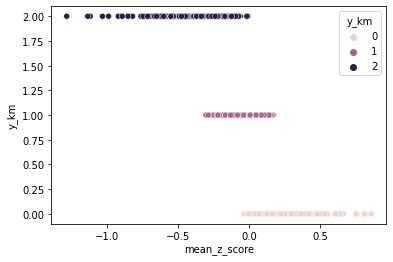

In [ ]:
sns.scatterplot(x='mean_z_score',y='y_km',data=deriv_table,hue='y_km') 

## EDA
- 그룹별로 변별이 되는 문제는 뭘까?
- 평균 z-score 높은 애들이 더 난이도 있는 문제를 푸는가?
- 문제를 더 많이 푸는가?
- 문제를 더 다양하게 푸는가?
- 유료 결제 학원에 다니는가? 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/프리윌린/z_score_with_subject.csv')

In [ ]:
deriv_table["student_id"] = deriv.loc[:,'student_id']

In [ ]:
deriv_table

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,mean_z_score,y_km,student_id
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.103462,1,I100008
1,0.0,0.000000,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.282589,0,I100067
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.061504,0,I100268
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.015122,1,I100300
4,0.0,-0.277275,0.000000,0.0,0.0,0.0,0.0,0.318624,-0.576109,-0.412951,...,0.000000,0.0,0.0,0.0,0.325906,0.411361,0.0,0.272104,0,I100360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,-1.950932,0.0,0.0,0.0,-2.985229,0.000000,0.0,0.005690,1,IB136
9931,0.0,-3.198429,0.000000,0.0,0.0,0.0,0.0,1.404408,0.000000,0.000000,...,0.258302,0.0,0.0,0.0,-0.756581,-0.486878,0.0,0.047447,1,IB159
9932,0.0,-3.198429,0.000000,0.0,0.0,0.0,0.0,1.404408,0.000000,0.000000,...,0.258302,0.0,0.0,0.0,-0.756581,-0.486878,0.0,0.047447,1,IB163
9933,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,-1.950932,0.0,0.0,0.0,-2.985229,0.000000,0.0,0.005690,1,IB189


In [ ]:
deriv_table.to_csv("deriv_final.csv", index = False)

In [ ]:
deriv_merge_table=deriv_table.loc[:,['student_id','y_km']]

In [ ]:
data2=pd.merge(data,deriv_merge_table,how='left',on='student_id')
data2.head()

,Unnamed: 0,student_id,problem_curriculum_id,level,count(problem_id),none,correct,wrong,unknown,rate,Z-score,name,parent3_id,parent3_name,y_km
0,0,I100008,3308,1,35,0,26,9,0,74.285714,-0.653638,곱셈 공식과 곱셈 공식의 변형,41.0,고등수학(상),1.0
1,1,I100008,3308,2,26,2,15,9,0,62.500000,-0.510792,곱셈 공식과 곱셈 공식의 변형,41.0,고등수학(상),1.0
2,2,I100008,3308,3,12,4,4,4,0,50.000000,-0.826631,곱셈 공식과 곱셈 공식의 변형,41.0,고등수학(상),1.0
3,3,I100008,3308,4,9,4,1,4,0,20.000000,-1.507341,곱셈 공식과 곱셈 공식의 변형,41.0,고등수학(상),1.0
4,4,I100008,3309,1,338,214,114,10,0,91.935484,-0.015597,다항식의 연산,41.0,고등수학(상),1.0


In [ ]:
data2["try"] = data2["correct"] + data2["wrong"]

### 0인 애들이 난이도 높은걸 많이 풀었는가? True

In [ ]:
k=pd.pivot_table(data2,values='try',index='level',columns='y_km',aggfunc=sum,margins=True)
k=k/k.loc['All']*100
k

y_km,0.0,1.0,2.0,All
level,,,,
1,13.730728,19.939434,19.836785,18.345580
2,30.509875,32.558675,33.514983,32.118838
3,34.994369,29.423763,29.702314,30.870024
4,16.941128,14.078699,13.654528,14.772515
5,3.823901,3.999429,3.291390,3.893043
All,100.000000,100.000000,100.000000,100.000000


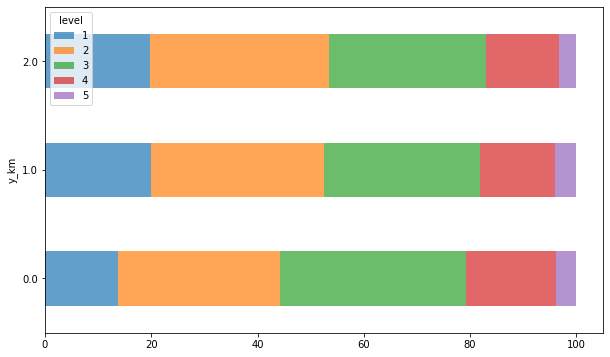

In [ ]:
k.transpose().iloc[:3,:5].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)

### 그룹을 구분짓는 주요 column은 무엇일까?
- 전체 그룹을 구분짓는 주요 column은 지수, 로그 부분 즉. 교재 앞부분

In [ ]:
deriv_table.head()

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,mean_z_score,y_km,student_id
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.103462,1,I100008
1,0.0,0.000000,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.282589,0,I100067
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.061504,0,I100268
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.015122,1,I100300
4,0.0,-0.277275,0.000000,0.0,0.0,0.0,0.0,0.318624,-0.576109,-0.412951,...,0.0,0.0,0.0,0.0,0.325906,0.411361,0.0,0.272104,0,I100360


In [ ]:
deriv_table['y_km'].value_counts()

1    7121
0    1839
2     975
Name: y_km, dtype: int64

In [ ]:
deriv_table = deriv_table.drop(['student_id'], axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(deriv_table.drop('y_km',axis=1),deriv_table['y_km'])

RandomForestClassifier(random_state=42)

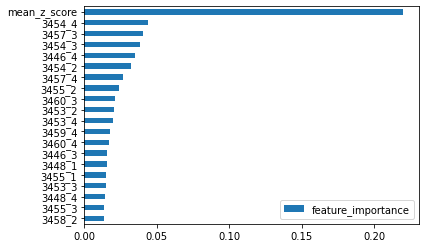

In [ ]:
feat_imp=pd.DataFrame(model.feature_importances_,index=model.feature_names_in_,columns=['feature_importance'])
imp_sorted=feat_imp.sort_values(by='feature_importance',ascending=True)
imp_sorted[-20:].plot(kind='barh')

In [ ]:
#0 그룹 비교
deriv_0_table=deriv_table[deriv_table['y_km']==0]

In [ ]:
deriv_0_table.head()

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5,mean_z_score,y_km
1,0.0,0.000000,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.000000,...,-2.048368,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.282589,0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.061504,0
4,0.0,-0.277275,0.000000,0.0,0.0,0.0,0.0,0.318624,-0.576109,-0.412951,...,1.105011,0.0,0.0,0.0,0.0,0.325906,0.411361,0.0,0.272104,0
5,0.0,-0.277275,0.000000,0.0,0.0,0.0,0.0,0.318624,-0.576109,-0.412951,...,1.105011,0.0,0.0,0.0,0.0,0.325906,0.411361,0.0,0.272104,0
6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.087626,0


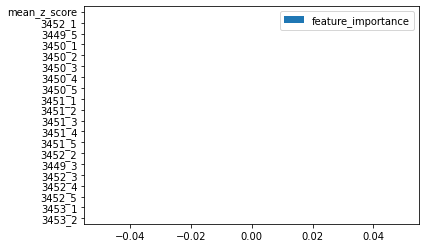

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(deriv_0_table.drop('y_km',axis=1),deriv_0_table['y_km'])
feat_imp=pd.DataFrame(model.feature_importances_,index=model.feature_names_in_,columns=['feature_importance'])
imp_sorted=feat_imp.sort_values(by='feature_importance',ascending=True)
imp_sorted[-20:].plot(kind='barh')

### 하나의 그룹을 변별하는 문제?


#### 잘하는애들

In [ ]:
deriv_0_table=deriv_table[deriv_table['y_km']==0]

In [ ]:
deriv_0_table=deriv_0_table.drop(['mean_z_score','y_km'],axis=1)
deriv_0_table.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_1,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5
1,0.0,0.000000,0.546214,0.0,0.0,0.0,0.0,0.760096,0.143747,0.000000,...,0.0,0.0,-2.048368,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,-0.277275,0.000000,0.0,0.0,0.0,0.0,0.318624,-0.576109,-0.412951,...,0.0,0.0,1.105011,0.0,0.0,0.0,0.0,0.325906,0.411361,0.0


In [ ]:
pca=PCA(n_components=10)
pca.fit(deriv_0_table)
pca.explained_variance_ratio_*100

array([6.19426814, 5.32944578, 4.13734213, 2.99943855, 2.76244366,
       2.49214492, 2.06239635, 1.99584491, 1.83740645, 1.80191735])

In [ ]:
deriv_0_table_pca=pca.fit_transform(deriv_0_table)

In [ ]:
component_names = [f"PC{i+1}" for i in range(deriv_0_table_pca.shape[1])]

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=deriv_0_table.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3444_1,0.033798,-0.039573,0.060704,-0.041286,0.015327,-0.039137,0.003594,0.007402,-0.023120,0.029255
3444_2,0.080529,-0.066688,0.107760,-0.080182,0.056231,0.104502,0.035628,0.104706,-0.084148,0.170834
3444_3,0.099615,0.008580,0.069527,0.010224,0.050155,0.099136,0.019917,-0.010565,-0.030648,0.080804
3444_4,0.124147,0.010843,0.032330,-0.035484,-0.020417,0.009115,0.069270,-0.008794,-0.236941,0.007863
3444_5,0.017998,0.012368,-0.016552,-0.003889,-0.004617,0.033246,-0.036800,0.023056,-0.035401,0.006289
...,...,...,...,...,...,...,...,...,...,...
3465_1,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
3465_2,0.000867,0.000522,-0.000200,-0.001016,0.000634,0.000576,0.000972,0.000835,0.000185,-0.000536
3465_3,0.118409,0.003272,0.171393,-0.039574,0.009444,-0.122016,-0.052273,0.065911,-0.068844,0.143478
3465_4,0.098419,0.095818,0.081209,-0.080703,-0.071090,-0.163165,0.025915,-0.042805,-0.077869,0.086930


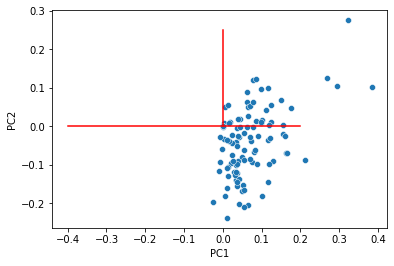

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=loadings)
plt.plot([0,0],[0,0.25],color='red')
plt.plot([-0.4,0.2],[0,0],color='red')

In [ ]:
loadings.sort_values(by='PC1',ascending=False).head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3446_5,0.384601,0.102413,-0.241546,0.204739,0.600422,0.109826,0.056227,-0.240103,0.133411,0.125680
3460_5,0.323164,0.275480,-0.067106,-0.225046,0.131377,-0.354092,0.192825,0.194404,0.000705,-0.053018
3460_4,0.293654,0.105035,0.081461,-0.069373,-0.234066,0.083352,0.328287,0.040117,0.423818,0.128190
3446_4,0.268745,0.124504,0.081127,-0.056175,-0.255838,0.161835,-0.138755,0.068114,0.045440,-0.366625
3454_4,0.210543,-0.088485,-0.286879,-0.395466,-0.281848,0.013096,-0.055502,-0.060844,0.040934,0.237397
3445_5,0.176475,0.046862,-0.125925,0.010700,0.180034,0.003170,-0.216834,0.147449,0.020273,-0.033556
3450_4,0.165663,-0.070363,0.004727,-0.016568,-0.028123,0.034387,-0.067713,0.161863,-0.237693,-0.037729
3448_4,0.163357,-0.069109,-0.006059,-0.066329,0.012875,0.042241,-0.072802,0.096372,-0.114016,-0.181317
3463_4,0.159534,-0.023980,0.070998,-0.078206,-0.011369,-0.119776,0.021790,0.095491,-0.123625,0.191139
3454_5,0.155770,-0.020809,-0.119137,0.000022,-0.013528,-0.013653,-0.182884,0.102971,-0.007256,-0.131626


In [ ]:
#우리 원래 column개수 만큼 주성분 나온다
#sum(각 주성분이 설명하는 분산* 해당 주성분 만들때 기여한 정도)
#클수록 해당 집단을 잘 변별하는 주요 문제이지 않을까? 문제 추천 모델!!

#### 못하는 애들

In [ ]:
deriv_2_table=deriv_table[deriv_table['y_km']==2]
deriv_2_table=deriv_2_table.drop(['mean_z_score','y_km'],axis=1)
deriv_2_table.head(3)

,3444_1,3444_2,3444_3,3444_4,3444_5,3445_1,3445_2,3445_3,3445_4,3445_5,...,3464_1,3464_2,3464_3,3464_4,3464_5,3465_1,3465_2,3465_3,3465_4,3465_5
15,-0.447367,-0.723135,-0.445747,0.0,0.0,0.0,-1.037849,-1.542721,0.000000,0.0,...,0.0,-0.677216,-2.048368,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
16,-0.396609,-0.861506,-0.445747,0.0,0.0,0.0,-1.142416,-1.736611,0.000000,0.0,...,0.0,-1.027384,-2.048368,0.0,0.0,0.0,0.0,-2.985229,0.0,0.0
30,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-1.736611,-1.775869,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
pca=PCA(n_components=10)
pca.fit(deriv_2_table)
pca.explained_variance_ratio_*100

array([8.10640961, 7.35906315, 5.13886042, 4.12529549, 3.24705459,
       3.05111341, 2.80086347, 2.41545078, 2.10757668, 2.09473782])

In [ ]:
deriv_2_table_pca=pca.fit_transform(deriv_2_table)
component_names = [f"PC{i+1}" for i in range(deriv_2_table_pca.shape[1])]

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=deriv_2_table.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3444_1,-0.099202,-0.003151,-0.098742,0.007898,-0.008260,0.090126,0.034559,0.106865,0.098260,0.107022
3444_2,-0.166421,0.048712,-0.052562,0.006688,0.002598,0.002273,0.020617,-0.105891,-0.028730,0.134708
3444_3,-0.025241,0.026131,-0.011737,-0.004928,0.011715,-0.020747,0.002004,-0.046913,-0.059788,0.038468
3444_4,-0.014955,0.024872,0.009437,-0.014917,0.051174,-0.031489,-0.002507,-0.063955,-0.051921,0.002070
3444_5,-0.002800,0.000062,-0.001382,0.001594,0.014584,-0.004450,0.002760,0.002222,0.009466,0.000244
...,...,...,...,...,...,...,...,...,...,...
3465_1,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3465_2,-0.008842,0.000357,-0.002477,0.003697,-0.002509,-0.004946,0.001581,-0.005359,-0.000490,0.003359
3465_3,-0.122574,0.054771,-0.083241,0.087899,0.055706,0.064839,0.034755,0.029276,-0.106601,0.179890
3465_4,-0.024929,0.015332,-0.001194,0.005024,0.020026,-0.002229,0.013678,-0.028475,0.001935,-0.003486


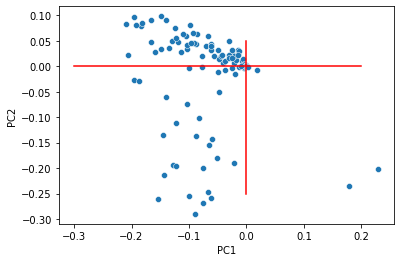

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=loadings)
plt.plot([0,0],[-0.25,0.05],color='red')
plt.plot([-0.3,0.2],[0,0],color='red')

In [ ]:
a = loadings.sort_values(by='PC1',ascending=False).head(20)

In [ ]:
a.drop('3445_1', axis = 0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3455_1,0.229684,-0.201493,-0.687454,-0.050000,0.029421,-0.079480,-0.055483,-0.278172,0.037155,-0.261379
3455_2,0.178646,-0.235887,-0.185902,0.046074,-0.438901,-0.330144,-0.344854,-0.089964,-0.178455,0.134601
3449_1,0.018264,-0.007703,-0.363083,-0.201421,0.213744,-0.194521,0.005170,0.435406,0.297873,0.019179
3465_5,0.002394,-0.001142,0.002176,0.001874,0.001452,-0.000449,0.002054,-0.002074,0.002721,0.001164
3459_5,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3465_1,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3463_1,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3451_5,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3452_5,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
3449_5,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [ ]:
|